https://fred.stlouisfed.org/categories/32447?t=bls%3Bindustry&ob=pv&od=desc
https://fred.stlouisfed.org/series/LNU04032232   - manufacturing
https://fred.stlouisfed.org/series/LNU04032231   - construction
https://fred.stlouisfed.org/series/LNU04032238   - financial
https://fred.stlouisfed.org/series/LNU04032236   - Transportation
https://fred.stlouisfed.org/series/LNU04032239  - Business


The dataset contains 5 time series representing the unemployment rate of various industries between 2000 and 2018. 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline

In [7]:
df_m = pd.read_csv('Unemployment Rate-Manufacturing.csv')
df_c = pd.read_csv('Unemployment Rate Construction.csv')
df_f = pd.read_csv('Unemployment Rate Financial .csv')
df_t = pd.read_csv('Unemployment Rate Transportation.csv')
df_pb = pd.read_csv('Unemployment Rate Professional and Business Services.csv')

In [3]:
df_m.shape

(222, 2)

In [4]:
df_c.shape

(222, 2)

In [84]:
df_pb.shape

(222, 2)

In [8]:
df_m.head()

,DATE,LNU04032232
0,2000-01-01,3.6
1,2000-02-01,3.4
2,2000-03-01,3.6
3,2000-04-01,3.7
4,2000-05-01,3.4


In [9]:
df_m.rename(columns= {'LNU04032232':'Manufacturing'}, inplace=True)

In [8]:
df_m.tail()

,DATE,Manufacturing
217,2018-02-01,3.6
218,2018-03-01,3.3
219,2018-04-01,3.3
220,2018-05-01,3.4
221,2018-06-01,3.1


In [9]:
df_c.head()

,DATE,LNU04032231
0,2000-01-01,9.7
1,2000-02-01,10.6
2,2000-03-01,8.7
3,2000-04-01,5.8
4,2000-05-01,5.0


In [10]:
df_c.rename(columns= {'LNU04032231':'Construction'}, inplace=True)

In [11]:
df_c.tail()

,DATE,Construction
217,2018-02-01,7.8
218,2018-03-01,7.4
219,2018-04-01,6.5
220,2018-05-01,4.4
221,2018-06-01,4.7


In [12]:
df_pb.head()

,DATE,LNU04032239
0,2000-01-01,5.7
1,2000-02-01,5.2
2,2000-03-01,5.4
3,2000-04-01,4.5
4,2000-05-01,4.7


In [11]:
df_f.rename(columns= {'LNU04032238':'Finance'}, inplace=True)
df_t.rename(columns= {'LNU04032236':'Transport'}, inplace=True)
df_pb.rename(columns= {'LNU04032239':'Business_Services'}, inplace=True)

In [12]:
from functools import reduce
dfs = [df_m, df_c, df_f, df_t, df_pb]
unemp_df = reduce(lambda left,right: pd.merge(left,right,on='DATE'), dfs)

In [15]:
unemp_df.shape

(222, 6)

In [7]:
unemp_df.head()

,DATE,Manufacturing,Construction,Finance,Transport,Business_Services
0,2000-01-01,3.6,9.7,2.7,4.3,5.7
1,2000-02-01,3.4,10.6,2.8,4.0,5.2
2,2000-03-01,3.6,8.7,2.6,3.5,5.4
3,2000-04-01,3.7,5.8,2.3,3.4,4.5
4,2000-05-01,3.4,5.0,2.2,3.4,4.7


In [8]:
unemp_df.isnull().sum()

DATE                 0
Manufacturing        0
Construction         0
Finance              0
Transport            0
Business_Services    0
dtype: int64

In [9]:
unemp_df.dtypes

DATE                  object
Manufacturing        float64
Construction         float64
Finance              float64
Transport            float64
Business_Services    float64
dtype: object

In [13]:
unemp_df['DATE'] = pd.to_datetime(unemp_df.DATE)
unemp_df = unemp_df.set_index('DATE')

In [11]:
unemp_df.head()

,Manufacturing,Construction,Finance,Transport,Business_Services
DATE,,,,,
2000-01-01,3.6,9.7,2.7,4.3,5.7
2000-02-01,3.4,10.6,2.8,4.0,5.2
2000-03-01,3.6,8.7,2.6,3.5,5.4
2000-04-01,3.7,5.8,2.3,3.4,4.5
2000-05-01,3.4,5.0,2.2,3.4,4.7


In [20]:
unemp_df.describe()

,Manufacturing,Construction,Finance,Transport,Business_Services
count,222.000000,222.000000,222.000000,222.000000,222.000000
mean,5.997297,10.021171,3.802252,5.326126,7.041892
std,2.410571,4.859059,1.482551,1.804404,2.057434
min,2.600000,4.400000,1.500000,2.300000,3.300000
25%,4.225000,6.200000,2.700000,4.000000,5.400000
50%,5.300000,8.550000,3.350000,4.750000,6.500000
75%,6.900000,12.275000,4.500000,6.475000,8.400000
max,13.000000,27.100000,7.700000,11.300000,12.400000


In [14]:
unemp_df.isnull().sum()

Manufacturing        0
Construction         0
Finance              0
Transport            0
Business_Services    0
dtype: int64

# Visualization

In [22]:
unemp_df.columns

Index(['Manufacturing', 'Construction', 'Finance', 'Transport',
       'Business_Services'],
      dtype='object')

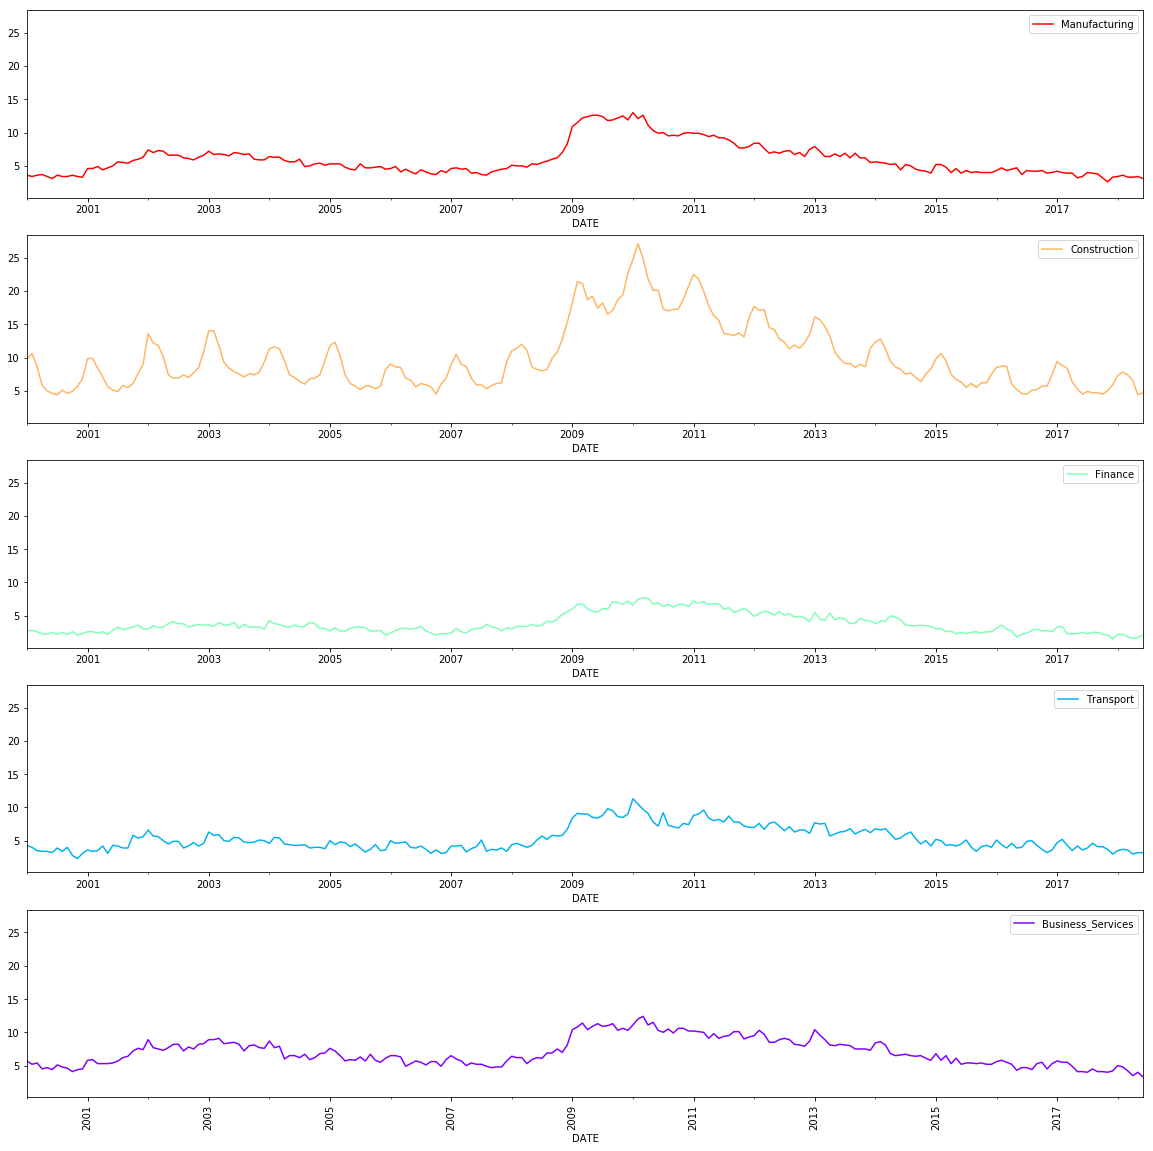

In [46]:

unemp_df.plot(subplots=True, sharex=False, sharey = True, layout = (5,1),figsize = (20,20) , colormap='rainbow_r')
plt.xticks(rotation=90)

plt.show()

When plotting the Finance,  Manufacturing, Transport and Business time series DataFrame, we observed increase in unemployment rates during 2008. For Construction , we observed increase in unemployment rates during 2009.  

# Plot monthly and yearly unemployment to find Seasonality and Trend

In [15]:
#monthly averages of unemployment rates in each sector
monthly_unemp = unemp_df.groupby(unemp_df.index.month).mean()
monthly_unemp

,Manufacturing,Construction,Finance,Transport,Business_Services
DATE,,,,,
1,6.400000,12.926316,3.805263,5.921053,7.794737
2,6.315789,13.310526,4.000000,5.831579,7.610526
3,6.210526,12.368421,3.852632,5.657895,7.478947
4,5.978947,10.394737,3.805263,5.273684,6.589474
5,5.905263,9.094737,3.657895,5.015789,6.778947
6,5.694737,8.468421,3.847368,5.147368,6.715789
7,6.172222,8.233333,3.766667,5.566667,6.933333
8,5.866667,8.194444,3.855556,5.311111,6.855556
9,5.855556,8.272222,3.750000,5.044444,6.927778


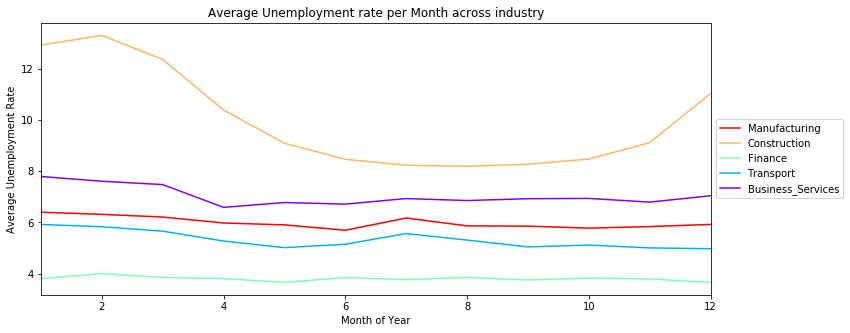

In [54]:
# plot the monthly averages of unemployment rates in each sector
ax = monthly_unemp.plot(figsize= (12,5),colormap= 'rainbow_r')
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')
ax.set_xlabel('Month of Year')
ax.set_ylabel('Average Unemployment Rate')
ax.set_title('Average Unemployment rate per Month across industry')
plt.show()

construction shows significant increase in Months 1, 2, 3 and 12 (winter month)

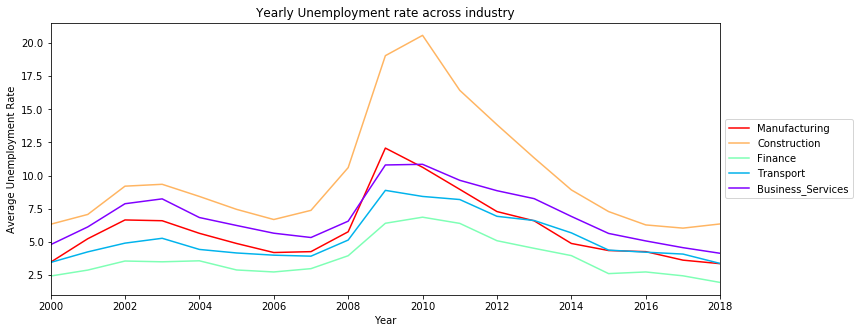

In [55]:
yearly_unemp = unemp_df.groupby(unemp_df.index.year).mean()
ax = yearly_unemp.plot(figsize= (12,5),colormap= 'rainbow_r')
ax.legend(bbox_to_anchor=(1.0, 0.5), loc='center left')
ax.set_xlabel('Year')
ax.set_ylabel('Average Unemployment Rate')
ax.set_title('Yearly Unemployment rate across industry')
plt.show()

We observed increase in unemployment rates during 2008, with Construction sector being affected the most.

# Decompose time series data

In [24]:
# Initialize dictionary
jobs_seasonal = {}
jobs_trend = {}
jobs_residual = {}

# Run time series decomposition on each time series of the DataFrame
for ts in unemp_df.columns:
    decomp = seasonal_decompose(unemp_df[ts])
    jobs_seasonal[ts] = decomp.seasonal
    jobs_trend[ts] = decomp.trend
    jobs_residual[ts] = decomp.resid

In [25]:
seasonality_df = pd.DataFrame(jobs_seasonal)
seasonality_df.head()

,Business_Services,Construction,Finance,Manufacturing,Transport
DATE,,,,,
2000-01-01,0.808752,3.078317,0.020244,0.511938,0.675132
2000-02-01,0.647478,3.425130,0.231764,0.415615,0.578073
2000-03-01,0.525909,2.508219,0.101617,0.301644,0.416063
2000-04-01,-0.372866,0.526601,0.078333,0.036938,0.024396
2000-05-01,-0.201297,-0.753056,-0.085393,-0.030709,-0.282221


 visualize the seasonality in these time series. 

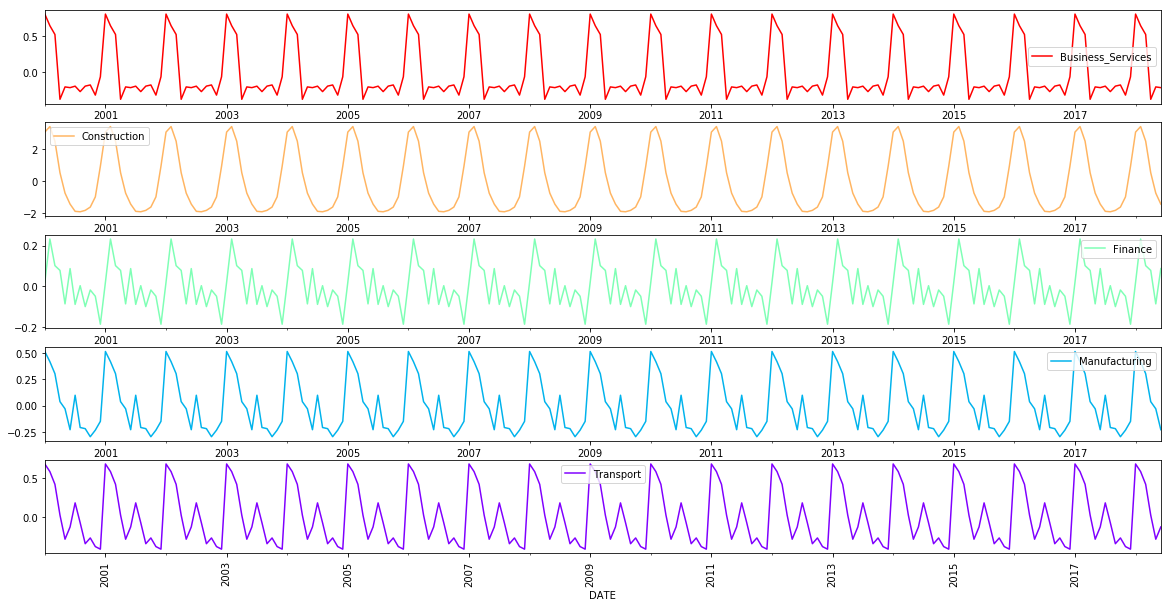

In [58]:
seasonality_df.plot(subplots=True, sharex=False, sharey = False, layout = (5,1),figsize = (20,10) , colormap='rainbow_r')
plt.xticks(rotation=90)
# Show plot
plt.show()

# question - 
which is correct to interpret seasonality pattern ? above plot or below plot ?

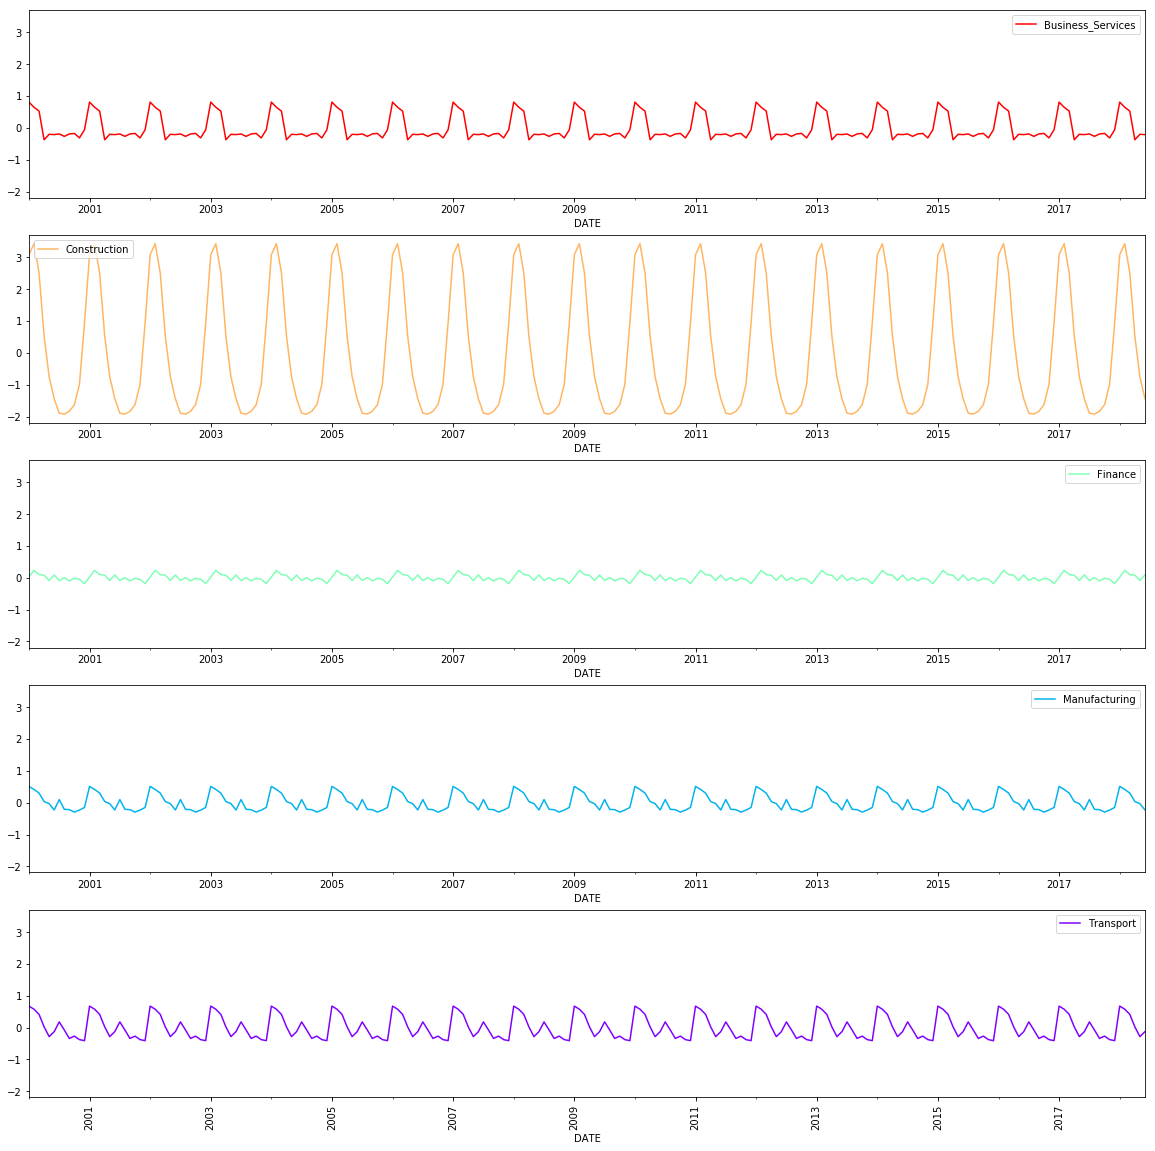

In [61]:
seasonality_df.plot(subplots=True, sharex=False, sharey = True, layout = (5,1),figsize = (20,20) , colormap='rainbow_r')
plt.xticks(rotation=90)
# Show plot
plt.show()

Each time series in the DataFrame have very different seasonality patterns!

Which job industries are similar or different?

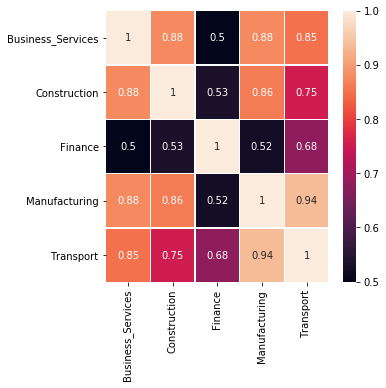

In [59]:
# Get correlation matrix of the seasonality_df DataFrame
seasonality_corr = seasonality_df.corr()
plt.figure(figsize=(5,5))
fig = sns.heatmap(seasonality_corr, annot=True,  linewidths=.4)
plt.show()



# Question
As per the above matrix, the construction industry's seasonality is similar with every industry except finance.
What to conclude from this ?

In [74]:
unemp_df.head()

,Manufacturing,Construction,Finance,Transport,Business_Services
DATE,,,,,
2000-01-01,3.6,9.7,2.7,4.3,5.7
2000-02-01,3.4,10.6,2.8,4.0,5.2
2000-03-01,3.6,8.7,2.6,3.5,5.4
2000-04-01,3.7,5.8,2.3,3.4,4.5
2000-05-01,3.4,5.0,2.2,3.4,4.7


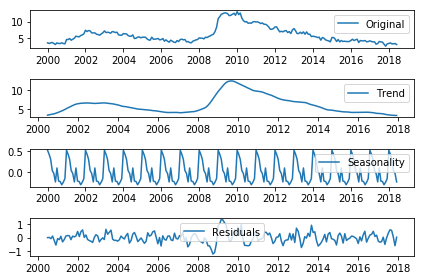

In [28]:
decomposition = seasonal_decompose(unemp_df.Manufacturing)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(unemp_df.Manufacturing, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [16]:

def test_stationarity(timeseries):
    
    #Determing rolling statistics we’ll take the average/variance of the last year, i.e. last 12 months. 
    rolmean = timeseries.rolling(window=12,center=False).mean()

    rolstd = timeseries.rolling(window=12,center=False).std()


    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Data')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    # dftest[0] is test statistics value, 1 is p-value etc..
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

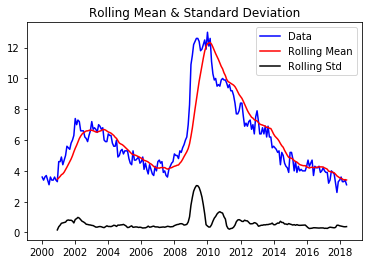

Results of Dickey-Fuller Test:
Test Statistic                  -2.547708
p-value                          0.104294
#Lags Used                      12.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64


In [13]:
test_stationarity(unemp_df.Manufacturing)

it confirms that the data is not stationary.

# Try with first order differencing

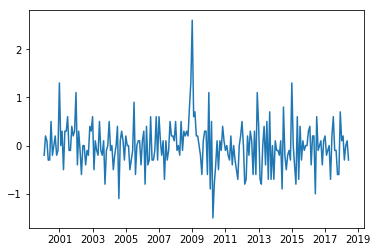

In [17]:
man_diff = unemp_df.Manufacturing - unemp_df.Manufacturing.shift()
plt.plot(man_diff)

In [65]:
man_diff.head()

DATE
2000-01-01    NaN
2000-02-01   -0.2
2000-03-01    0.2
2000-04-01    0.1
2000-05-01   -0.3
Freq: MS, Name: Manufacturing, dtype: float64

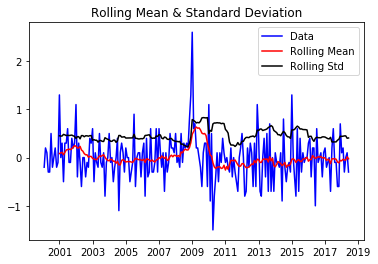

Results of Dickey-Fuller Test:
Test Statistic                  -2.772311
p-value                          0.062339
#Lags Used                      11.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64


In [66]:
man_diff.dropna(inplace=True)
test_stationarity(man_diff)

After first order differencing, the data is not stationary. So try taking log transformation and then taking the difference.

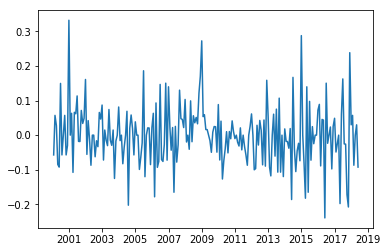

In [67]:
man_log = np.log(unemp_df.Manufacturing)
man_log_diff = man_log - man_log.shift()
plt.plot(man_log_diff)

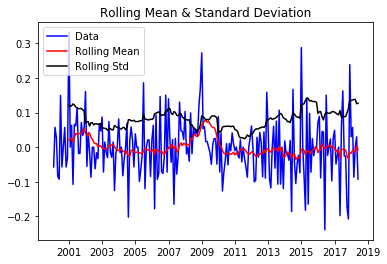

Results of Dickey-Fuller Test:
Test Statistic                  -2.720531
p-value                          0.070552
#Lags Used                      11.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64


In [68]:
man_log_diff.dropna(inplace=True)
test_stationarity(man_log_diff)

Try taking different transformation and then first order difference.

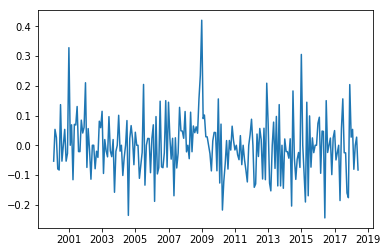

In [69]:
man_sqrt = np.sqrt(unemp_df.Manufacturing)
man_sqrt_diff = man_sqrt - man_sqrt.shift()
plt.plot(man_sqrt_diff)

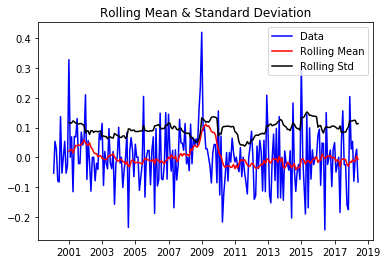

Results of Dickey-Fuller Test:
Test Statistic                  -2.735619
p-value                          0.068075
#Lags Used                      11.000000
Number of Observations Used    209.000000
Critical Value (1%)             -3.462032
Critical Value (5%)             -2.875471
Critical Value (10%)            -2.574195
dtype: float64


In [70]:
man_sqrt_diff.dropna(inplace=True)
test_stationarity(man_sqrt_diff)

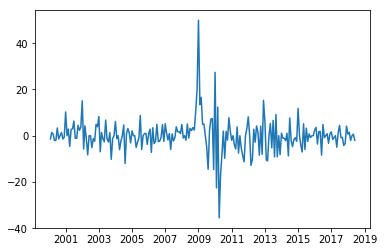

In [14]:
man_square = np.square(unemp_df.Manufacturing)
man_square_diff = man_square - man_square.shift()
plt.plot(man_square_diff)
plt.show()

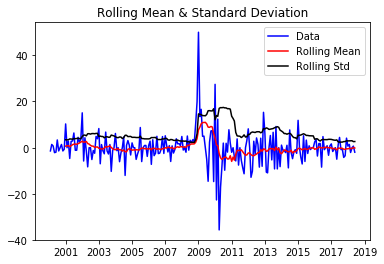

Results of Dickey-Fuller Test:
Test Statistic                  -3.976015
p-value                          0.001541
#Lags Used                      14.000000
Number of Observations Used    206.000000
Critical Value (1%)             -3.462499
Critical Value (5%)             -2.875675
Critical Value (10%)            -2.574304
dtype: float64


In [15]:
man_square_diff.dropna(inplace=True)
test_stationarity(man_square_diff)

The data is now stationary after taking the square transformation of the actual unemployment data. So we will go ahead with the square transformed data.

# Generate and Interpret an autocorrelation function (ACF) and PACF.

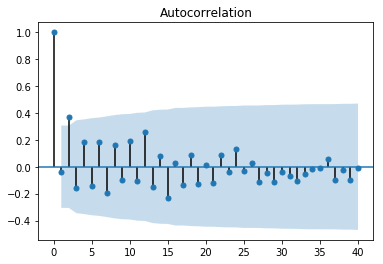

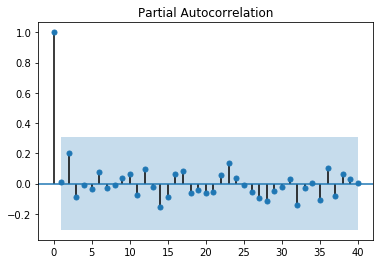

In [16]:
x_acf = pd.DataFrame(acf(man_square_diff))
x_pacf = pd.DataFrame(pacf(man_square_diff))
plot_acf(x_acf)
plot_pacf(x_pacf)
plt.show()

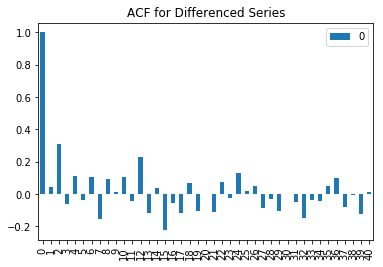

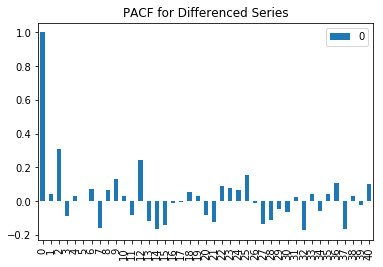

In [80]:
x_acf.plot(kind='bar')
plt.title('ACF for Differenced Series')
plt.show()

x_pacf.plot(kind='bar')
plt.title('PACF for Differenced Series')
plt.show()

In [19]:

man_train30 = np.square(unemp_df.Manufacturing)[:-30].dropna()
man_test30 = np.square(unemp_df.Manufacturing)[-30:]

In [18]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Function to generate predictions for a given arima order
def evaluate_arima(train, test, arima_order):
    # Populate history based on training set
    history = [x for x in train]
    
    # Create blank list of predictions to populate
    predictions = list()
    
    # Use rolling forward walk predictions.  Fit model using history,
    # adding each prediction to history to continue forecasting
    
    for i in range(len(test)):
        # Fit using history
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        
        # Get prediction
        y_pred = model_fit.forecast()[0]
        
        # Append prediction to prediction list to check accuracy 
        predictions.append(y_pred)
        
        # Append to history to continue to rolling forecast 
        history.append(y_pred)
    
    error = mean_squared_error(test, predictions)
    return error

# Function to determine best arima order combination based on lowest MSE
def arima_gridsearch(train, test, p_vals, d_vals, q_vals):
    
    best_score = float('inf') 
    best_config = None
    for p in p_vals:
        for d in d_vals:
            for q in q_vals:
                arima_order = (p, d, q)
                try:
                    mse = evaluate_arima(train, test, arima_order)
                    if mse < best_score:
                        best_score, best_config = mse, arima_order
                    print('ARIMA config: {}; MSE:{}'.format(arima_order, mse))
                except (ValueError, np.linalg.LinAlgError): # ignore non converging errors
                    pass
    
    print('Best ARIMA config:', best_config)
    print('MSE:', best_score)

In [23]:
# Fit and test RUN ARIMA model- 30 day test period
arima_gridsearch(man_train30, man_test30, range(4), range(3), range(4))

ARIMA config: (0, 0, 0); MSE:982.205075854184
ARIMA config: (0, 0, 1); MSE:952.4329716037132
ARIMA config: (0, 0, 3); MSE:927.0974443321671
ARIMA config: (0, 1, 0); MSE:17.35093280849399
ARIMA config: (0, 1, 1); MSE:17.32503939686802
ARIMA config: (0, 1, 2); MSE:17.35407957437996
ARIMA config: (0, 1, 3); MSE:17.6935407169199
ARIMA config: (0, 2, 0); MSE:27.62886589104492
ARIMA config: (0, 2, 1); MSE:159.15345410932994
ARIMA config: (0, 2, 2); MSE:135.64547258358255
ARIMA config: (1, 0, 0); MSE:85.91518161538552
ARIMA config: (1, 0, 1); MSE:94.17206893937343
ARIMA config: (1, 0, 2); MSE:187.50074017283436
ARIMA config: (1, 0, 3); MSE:160.08605125756054
ARIMA config: (1, 1, 0); MSE:17.308412431035602
ARIMA config: (1, 1, 1); MSE:15.972853543891548
ARIMA config: (1, 1, 2); MSE:17.495986856547006
ARIMA config: (1, 1, 3); MSE:17.56724938990577
ARIMA config: (1, 2, 0); MSE:18.056344385034507
ARIMA config: (1, 2, 1); MSE:290.80376310436804
ARIMA config: (1, 2, 3); MSE:251.19326481150736
ARIMA

In [20]:
import datetime 

# Function to evaluate residuals
def plot_residuals(name, train, p, d, q):
    model = ARIMA(train, order=(p,d,q))
    model_fit = model.fit()
    residuals = model_fit.resid
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('{}: {},{},{} Residuals'.format(name, p, d, q))
    residuals.plot()
    
    plt.subplot(1,2,2)
    residuals.hist(bins=25)
    plt.title('{} Residual Histogram'.format(name))
    plt.show()

# Function to plot predictions
def plot_predictions(name, train, test, p, d, q):
    
    arima_order = (p,d,q)
    
    history = [x for x in train]
    
    # Create blank list of predictions to populate
    predictions = list()
    
    # Recreate evaluate_arima model.  Need to do this instead of calling existing model
    # to return predictions list
    
    for i in range(len(test)):
        # Fit using history
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        
        # Get prediction
        y_pred = model_fit.forecast()[0]
        
        # Append prediction to prediction list to check accuracy 
        predictions.append(y_pred)
        
        # Append to history to continue to rolling forecast 
        history.append(y_pred)
     
    # Plots
    plt.figure(figsize=(10, 5))
    
    plt.subplot(121)
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, predictions, label='Predictions')
    plt.title('{} Prediction Validation: - Full Time Series'.format(name))
    plt.ylabel('Price ($)')
    plt.xticks(rotation=60)
    plt.legend()
    
    plt.subplot(122)
    plt.autoscale()
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, predictions, label='Predictions')
    plt.title('{} Prediction Validation - 2018'.format(name))
    plt.ylabel('Price ($)')
    plt.ylim(min(predictions) - 5, max(predictions) + 5)
    plt.xlim([datetime.date(2018, 1, 1), datetime.date(2018, 6, 1)])
    plt.xticks(rotation=60)
    plt.legend()
    
    plt.tight_layout()

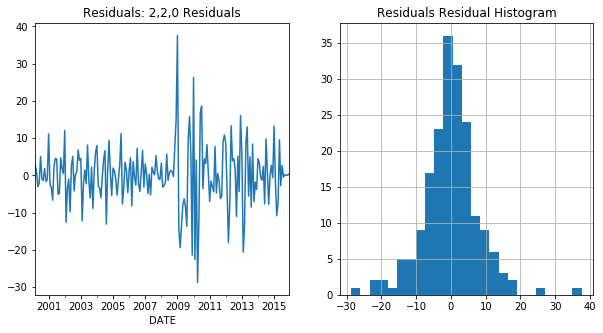

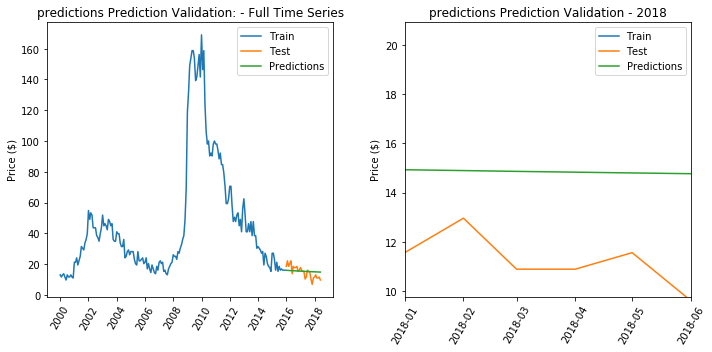

In [27]:
plot_residuals('Residuals', man_train30, 2,2,0)
plot_predictions('predictions', man_train30, man_test30, 2,2,0)

# Do statistics test on residual - it should follow normal distribution

# Try Seasonal ARIMA

# try taking seasonal difference first and do adfuller test

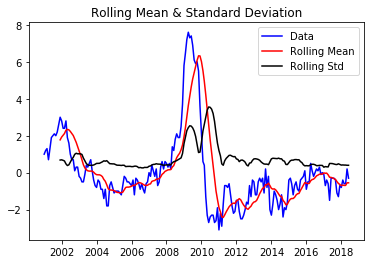

Results of Dickey-Fuller Test:
Test Statistic                  -2.225755
p-value                          0.197031
#Lags Used                      13.000000
Number of Observations Used    196.000000
Critical Value (1%)             -3.464161
Critical Value (5%)             -2.876402
Critical Value (10%)            -2.574692
dtype: float64


In [69]:
man_seasonal_diff = unemp_df.Manufacturing - unemp_df.Manufacturing.shift(12)
man_seasonal_diff.dropna(inplace=True)
test_stationarity(man_seasonal_diff)

The high p value confirms that the data is not stationary.

# Try taking seasonal difference on the first order difference and then do the adfuller test

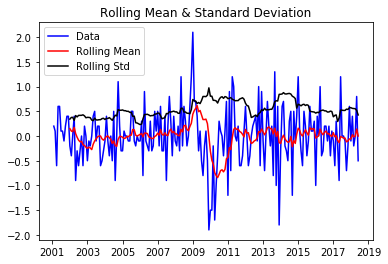

Results of Dickey-Fuller Test:
Test Statistic                -6.231629e+00
p-value                        4.937310e-08
#Lags Used                     1.200000e+01
Number of Observations Used    1.960000e+02
Critical Value (1%)           -3.464161e+00
Critical Value (5%)           -2.876402e+00
Critical Value (10%)          -2.574692e+00
dtype: float64


In [72]:
man_first_diff = unemp_df.Manufacturing - unemp_df.Manufacturing.shift()
man_seasonal_first_diff = man_first_diff - man_first_diff.shift(12)
man_seasonal_first_diff.dropna(inplace=True)
test_stationarity(man_seasonal_first_diff)

The P value is < 0.05. so the data is now stationary.

# Plot the ACF and PACF of the seasonal differenced data

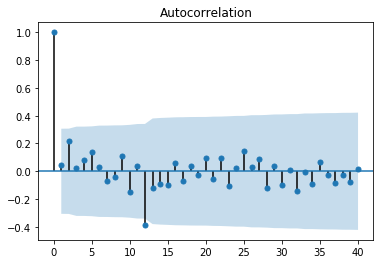

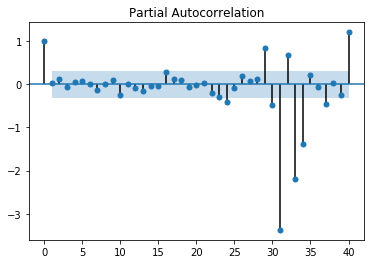

In [73]:
x_acf = pd.DataFrame(acf(man_seasonal_first_diff))
x_pacf = pd.DataFrame(pacf(man_seasonal_first_diff))
plot_acf(x_acf)
plot_pacf(x_pacf)
plt.show()

# Question
Why I am getting weared values for ACF and PACF ? What should be the values to be decided from these plots???

In [65]:
man_seas_train30 = unemp_df.Manufacturing[:-30].dropna()
man_seas_test30 = unemp_df.Manufacturing[-30:]

In [49]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [26]:
aic_df = pd.DataFrame(columns = ['Non_Seasonal_param', 'Seasonal_param', 'AIC'])

In [ ]:
import warnings
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [74]:

for param in pdq:
    #print(param)
    for param_seasonal in seasonal_pdq:
        
        try:
            
            mod = sm.tsa.statespace.SARIMAX(man_seas_train30,
                                            order=param,
                                            seasonal_order=param_seasonal)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            aic_df.append({'Non_Seasonal_param':param , 'Seasonal_param':param_seasonal, 'AIC':results.aic}, ignore_index=True)
        except:
            continue
            
            
print('Done')            

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1281.7879788923644
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:787.3166005403373
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:785.2839651438223
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:855.5145908465204
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:851.8855276459424
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:785.9739570077543
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:787.1908407216846
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:852.2473413761053
ARIMA(0, 0, 0)x(2, 0, 1, 12)12 - AIC:853.8692093585321
ARIMA(0, 0, 0)x(2, 1, 0, 12)12 - AIC:784.7863004366624
ARIMA(0, 0, 0)x(2, 1, 1, 12)12 - AIC:759.79660769551
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1050.64417483024
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:657.2124279126036
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:656.9919635662591
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:657.2160396636486
ARIMA(0, 0, 1)x(2, 0, 1, 12)12 - AIC:661.212427722429
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:274.43197938123234
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:263.8566007818567
ARIMA(0, 1, 

C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:242.23056582494993
ARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:242.64956133647428
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:260.15467840936583
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:247.00163107955007
ARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:247.47604767786845
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:283.9420922989473
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:242.66827199765746
ARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:244.64874945674057
ARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:258.9382285442315
ARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:247.511659652778


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:249.47138151346485
ARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:272.12505604037597
ARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:244.62687929116706
ARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:246.66483380024255
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:276.34661772082416
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:265.8453731984432
ARIMA(0, 1, 1)x(0, 0, 2, 12)12 - AIC:263.7453198305825
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:319.4674289513997
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:244.0534209677946
ARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:244.40526590979744
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:262.1072740834054
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:248.93281374549014
ARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:249.360447093398
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:285.5551871393219
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:244.42970393669165
ARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:246.40428391881426
ARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:260.90952560450364
ARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:249.39781055509582


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:251.36190404460694
ARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:273.6938172811059
ARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:246.3803671478299
ARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:248.42829583775307
ARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:271.16305949250955
ARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:260.9212837176452
ARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:259.86335786005486
ARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:315.66182963145565
ARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:239.6933006861421
ARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:240.46188995863508
ARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:257.68328986081036
ARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:244.04359964548095


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:244.8048616836425
ARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:282.9599458208023
ARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:240.53507882701786
ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:242.42235383369288
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:257.00948076673797
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:244.8856575217725


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:246.7629407072701
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:268.776809083802
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:242.32890102787246


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:241.8427641214442
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:281.971822713433
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:320.7247953166148

C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:244.02932112421277
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:267.4995543256032
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:254.8783034124296
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:287.3293597125722
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:244.393831833234
ARIMA(1, 0, 0)x(2, 0, 0, 12)12 - AIC:266.07678651710245


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(2, 0, 1, 12)12 - AIC:254.94653898726781
ARIMA(1, 0, 0)x(2, 1, 0, 12)12 - AIC:275.81956084894045
ARIMA(1, 0, 0)x(2, 1, 1, 12)12 - AIC:246.32307592635874
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:283.8916018171662
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:321.043334592372
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:245.9067424845932
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:269.4388599458266
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:257.4018574797209
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:288.76119773125765
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:246.1715377399609
ARIMA(1, 0, 1)x(2, 0, 0, 12)12 - AIC:268.03396672566737
ARIMA(1, 0, 1)x(2, 0, 1, 12)12 - AIC:258.1021549578324
ARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:277.25262663777124
ARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:248.10486616667842
ARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:278.6394091358291
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:315.88679314752153
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:241.75679878052617
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:264.8739302869196


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:251.5023634692139
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:285.55970220573533
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:242.28483305510989
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:263.9858594827327


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x(2, 0, 1, 12)12 - AIC:251.13205704861545
ARIMA(1, 0, 2)x(2, 1, 0, 12)12 - AIC:271.8363308157374
ARIMA(1, 0, 2)x(2, 1, 1, 12)12 - AIC:244.08941672378236
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:276.31185944973805
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:265.84078898302397
ARIMA(1, 1, 0)x(0, 0, 2, 12)12 - AIC:263.74048676573966
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:319.02411007309826
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:243.980210165779
ARIMA(1, 1, 0)x(0, 1, 2, 12)12 - AIC:244.30800199701608
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:262.0884830331521
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:248.90434832245873
ARIMA(1, 1, 0)x(1, 0, 2, 12)12 - AIC:249.29936814828164
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:285.4176000458335
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:244.33482367731085
ARIMA(1, 1, 0)x(1, 1, 2, 12)12 - AIC:246.3084209759034
ARIMA(1, 1, 0)x(2, 0, 0, 12)12 - AIC:260.8984686988816
ARIMA(1, 1, 0)x(2, 0, 1, 12)12 - AIC:249.34045743417812


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(2, 0, 2, 12)12 - AIC:251.31069860545733
ARIMA(1, 1, 0)x(2, 1, 0, 12)12 - AIC:273.5044915847604
ARIMA(1, 1, 0)x(2, 1, 1, 12)12 - AIC:246.28090457105066
ARIMA(1, 1, 0)x(2, 1, 2, 12)12 - AIC:248.33270486610786
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:261.5746107189424


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:255.82630864654624
ARIMA(1, 1, 1)x(0, 0, 2, 12)12 - AIC:255.92860844341226
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:316.24499971362025
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:238.11604020921183
ARIMA(1, 1, 1)x(0, 1, 2, 12)12 - AIC:239.26481282297155
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:254.34570935862803
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:249.5909876609251
ARIMA(1, 1, 1)x(1, 0, 2, 12)12 - AIC:249.46066544241341
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:281.17711926110985
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:239.28580796576847


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:241.26427114826183
ARIMA(1, 1, 1)x(2, 0, 0, 12)12 - AIC:255.02583933463598


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(2, 0, 1, 12)12 - AIC:249.2798699216752
ARIMA(1, 1, 1)x(2, 0, 2, 12)12 - AIC:253.5630798621562
ARIMA(1, 1, 1)x(2, 1, 0, 12)12 - AIC:267.58309622255376
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:241.24870043842128
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:243.24602219096454


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(0, 0, 0, 12)12 - AIC:262.5161606560134
ARIMA(1, 1, 2)x(0, 0, 1, 12)12 - AIC:262.28075217063844
ARIMA(1, 1, 2)x(0, 0, 2, 12)12 - AIC:261.4239299201611
ARIMA(1, 1, 2)x(0, 1, 0, 12)12 - AIC:316.75556495245263
ARIMA(1, 1, 2)x(0, 1, 1, 12)12 - AIC:236.54172222400047
ARIMA(1, 1, 2)x(0, 1, 2, 12)12 - AIC:237.91207887788676
ARIMA(1, 1, 2)x(1, 0, 0, 12)12 - AIC:259.1892355046786
ARIMA(1, 1, 2)x(1, 0, 1, 12)12 - AIC:242.50799842008553


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:243.85451664559005
ARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:280.7267902340374
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:237.92845956461028


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:239.89607069320502
ARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:258.73656884990686
ARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:243.90415012620858
ARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:246.27718379144162
ARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:265.7206196706989
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:239.89276134063667
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:241.82442074580666
ARIMA(2, 0, 0)x(0, 0, 0, 12)12 - AIC:283.858690561816
ARIMA(2, 0, 0)x(0, 1, 0, 12)12 - AIC:320.300838393895
ARIMA(2, 0, 0)x(0, 1, 1, 12)12 - AIC:245.86659080669406
ARIMA(2, 0, 0)x(1, 0, 0, 12)12 - AIC:269.41430245073263
ARIMA(2, 0, 0)x(1, 0, 1, 12)12 - AIC:256.824537153145
ARIMA(2, 0, 0)x(1, 1, 0, 12)12 - AIC:288.5372503567572
ARIMA(2, 0, 0)x(1, 1, 1, 12)12 - AIC:246.08355251946597
ARIMA(2, 0, 0)x(2, 0, 0, 12)12 - AIC:268.01703682063805


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 0)x(2, 0, 1, 12)12 - AIC:256.9300143241322
ARIMA(2, 0, 0)x(2, 1, 0, 12)12 - AIC:276.9865291482072
ARIMA(2, 0, 0)x(2, 1, 1, 12)12 - AIC:248.00233408839125


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 0, 12)12 - AIC:270.1781769852575
ARIMA(2, 0, 2)x(0, 1, 0, 12)12 - AIC:311.4876996787695
ARIMA(2, 0, 2)x(0, 1, 1, 12)12 - AIC:237.2166800468671
ARIMA(2, 0, 2)x(1, 0, 0, 12)12 - AIC:266.4265618370065
ARIMA(2, 0, 2)x(1, 0, 1, 12)12 - AIC:246.78758915502206
ARIMA(2, 0, 2)x(1, 1, 0, 12)12 - AIC:277.73515850647016
ARIMA(2, 0, 2)x(1, 1, 1, 12)12 - AIC:238.51581642239427
ARIMA(2, 0, 2)x(2, 0, 0, 12)12 - AIC:264.4895820433185


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 1, 12)12 - AIC:248.22470548170645
ARIMA(2, 0, 2)x(2, 1, 0, 12)12 - AIC:265.13929591436886


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 1, 1, 12)12 - AIC:240.5151870423631
ARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:270.177826959813
ARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:260.0932676082759
ARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:259.0689670958763
ARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:314.8840577807131
ARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:238.18252598270533
ARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:239.08619409237855
ARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:256.84725696239184
ARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:242.65133238608794
ARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:243.51913109706027
ARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:281.72742277475464
ARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:239.15962448713532
ARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:240.99051097886309
ARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:256.0002201003263


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:243.59662377752795


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:245.42821581998484
ARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:266.51657966741396
ARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:240.90625632978876


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:240.57192454491823
ARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:262.27579252507314
ARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:261.2809960701317
ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:260.69811248519966
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:316.5065061576879
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:236.2319529468901
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:237.65764012381015
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:258.47706541228456
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:242.02002212542524
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:243.4172936378957
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:280.63807363955243
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:237.67505836628138
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:239.63312080401715
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:257.9807361656185
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:243.4357452319249
ARIMA(2, 1, 1)x(2, 0, 2, 12)12 - AIC:246.2352243213101
ARIMA(2, 1, 1)x(2, 1, 0, 12)12 - AIC:265.43527450017973
ARIMA(2, 1, 1)x(2, 1, 1, 12)12 - AIC:239.63436695123198

C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:261.4025545740154


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:255.4425497530636


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:255.53649388093407
ARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:317.9336921329988
ARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:238.09581600257104
ARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:239.53234965111804


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:253.8430905804166
ARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:243.6352054664814
ARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:247.17749946711382
ARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:282.37072068229884
ARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:239.55144882835268


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:241.50491242603402


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:254.234735200067


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:247.40518291538197


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:247.31279205640598
ARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:266.98924760427917
ARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:241.50213856791765


C:\Users\gyans\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:243.4695998172599
Done


# Question
Why the data is not saved in the DataFrame ?? Is it because of exception ? How to save the results ???

In [75]:
aic_df.sort_values(by= 'AIC', ascending = False)

,Non_Seasonal_param,Seasonal_param,AIC


In [ ]:
ARIMA(2, 1, 1)x(0, 1, 1, 12) - has lowest AIC value. # found by manually searching from above result

In [89]:
mod = sm.tsa.statespace.SARIMAX(man_seas_train30,
                                order=(2, 1, 1),
                                seasonal_order=(0, 1, 1, 12))

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Manufacturing   No. Observations:                  192
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -113.116
Date:                            Mon, 16 Jul 2018   AIC                            236.232
Time:                                    15:25:06   BIC                            252.169
Sample:                                01-01-2000   HQIC                           242.694
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6453      0.174      3.715      0.000       0.305       0.986
ar.L2          0.1731      0.085   

Text(0.5,1,'Residual Histogram')

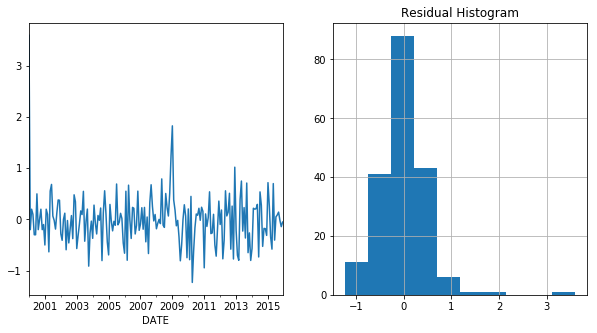

In [93]:
residuals = results.resid
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
residuals.plot()
    
plt.subplot(1,2,2)
residuals.hist()
plt.title('Residual Histogram')



# The SARIMAX model - The residual is not Normal .

In [104]:
def evaluate_Sarima(train, test, arima_order, s_arima_order):
    
    history = [x for x in train]
    predictions = list()
    
    for i in range(len(test)):
        
        model = sm.tsa.statespace.SARIMAX(history,
                                            order=arima_order,
                                            seasonal_order=s_arima_order)

        model_fit = model.fit()
        
        # Get prediction
        y_pred = model_fit.forecast()[0]
        
        # Append prediction to prediction list to check accuracy 
        predictions.append(y_pred)
        
        # Append to history to continue to rolling forecast 
        history.append(y_pred)
    
    error = mean_squared_error(test, predictions)
    return error


def seasonal_arima_gridsearch(train, test):
    best_score = float('inf') 
    best_config = None
    best_seasonal_config = None
    for param in pdq:
        for param_seasonal in seasonal_pdq:
        
            try:
                mse = evaluate_Sarima(train, test, param, param_seasonal)
                if mse < best_score:
                    best_score, best_config, best_seasonal_config = mse, param, param_seasonal
                    print('SARIMA config: {} {} ; MSE:{}'.format(param, param_seasonal, mse))
            except (ValueError, np.linalg.LinAlgError): # ignore non converging errors
                pass
    
    print('Best SARIMA config:', best_config, best_seasonal_config)
    print('MSE:', best_score)

# I tried to find MSE for this. But This didn't work. kept on running ... what is the issue in the code ?


In [134]:
# Fit and test RUN ARIMA model- 30 day test period
#seasonal_arima_gridsearch(man_train30, man_test30)

# 

# Found from google that auto arima is helpful is u have seasonality. So trying

In [111]:
#import pyramid
from pyramid.arima import auto_arima

In [113]:
stepwise_fit = auto_arima(man_seas_train30, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True, d=1, D=1, trace=True,
                          error_action='ignore',  # don't want to know if an order does not work
                          suppress_warnings=True,  # don't want convergence warnings
                          stepwise=True)  # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=239.482, BIC=255.418, Fit time=1.224 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=320.645, BIC=327.020, Fit time=0.057 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=287.255, BIC=300.005, Fit time=0.302 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=243.767, BIC=256.516, Fit time=0.821 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=240.557, BIC=259.682, Fit time=1.322 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=318.244, BIC=330.993, Fit time=0.202 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=240.532, BIC=259.656, Fit time=4.865 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=242.846, BIC=265.158, Fit time=2.672 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=237.418, BIC=256.542, Fit time=1.026 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  192
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -112.709
Date:                            Mon, 16 Jul 2018   AIC                            237.418
Time:                                    17:20:23   BIC                            256.542
Sample:                                         0   HQIC                           245.173
                                            - 192                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0022      0.003     -0.834      0.404      -0.007       0.003
ar.L1          0.6186      0.196      3.162      0.002       0.235       1.002
ar.L2          0.1745      0.085      2.056      0.040       0.008       0.341
ma.L1         -0.6381      0.200     -3.190      0.001      -1.030      -0.246
ma.S.L12      -0.9972      2.788     -0.358      0.721      -6.462       4.468
sigma2         0.1719      0.475      0.362      0.717      -0.759       1.102
===================================================================================
Ljung-Box (Q):                       39.49   Jarque-Bera (JB):                17.15
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               2.09   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
y_pred = stepwise_fit.predict(n_periods=30)
print(  mean_squared_error(man_seas_test30, y_pred))

199.717468682


In [131]:
type(y_pred)

numpy.ndarray

In [127]:
test = pd.DataFrame(man_seas_test30)

"plt.plot(man_seas_test30.index, man_seas_test30, label='Test')\nplt.plot(man_seas_test30.index, y_pred, label='Predictions')\nplt.show()"

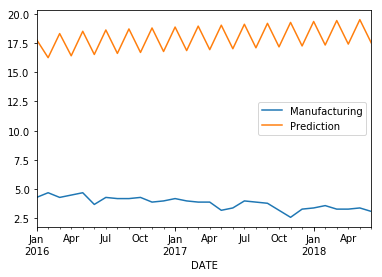

In [132]:
future_forecast = pd.DataFrame(y_pred,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()
#plt.plot(man_seas_train30.index, train, label='Train')
'''plt.plot(man_seas_test30.index, man_seas_test30, label='Test')
plt.plot(man_seas_test30.index, y_pred, label='Predictions')
plt.show()'''

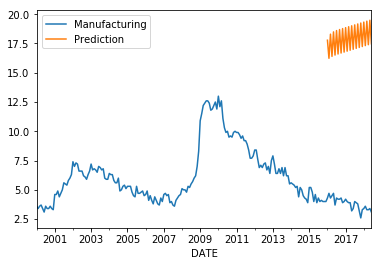

In [133]:

pd.concat([unemp_df.Manufacturing,future_forecast],axis=1).plot()

# Where is the issue in code ? Why the predictions are not even near to the actual values ???
